<a href="https://colab.research.google.com/github/King-Bowie/projeto_olimpiadas/blob/main/Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Olá a todes,
<h3>Neste projeto estamos analisando e explorando dados das olimpíadas de 1896 até 2016<h3>

<h5> Estes dados estão disponíveis em:</h5>
<a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results"> Kaggle - 120 years of Olympic history: athletes and results </a>

Já que o Github não permite o upload de "athlete_events.csv" então recomendo fazer o download no kaggle para ter a melhor experiência

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

atletas = pd.read_csv('athlete_events.csv')
atletas

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
atletas.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


###Quantos dados possuimos?

In [7]:
print(f'No dataset de atletas temos {atletas.shape[0]} registros e {atletas.shape[1]} tipos de variáveis de classificação')

No dataset de atletas temos 271116 registros e 15 tipos de variáveis de classificação


###Quantos registro existem em cada ano?

In [8]:
atletas['Year'].value_counts()

1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7480
1936     7401
1956     6434
1924     5693
1928     5574
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1932     3321
1994     3160
1908     3101
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

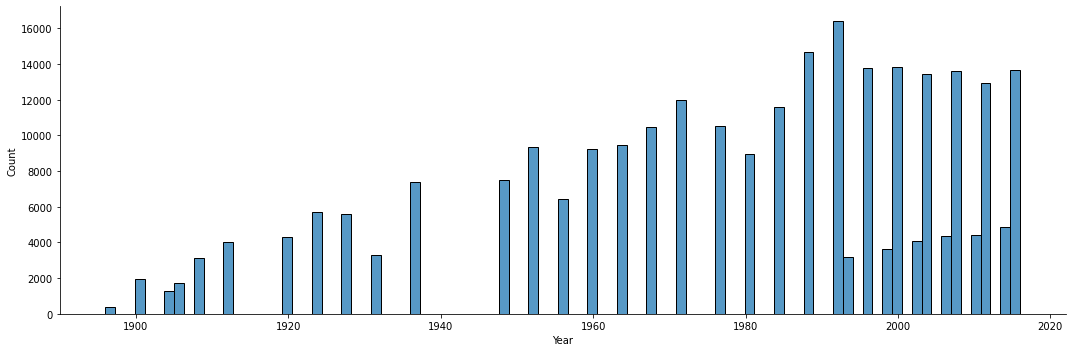

In [9]:
sns.displot(data = atletas, x="Year", kind='hist',aspect=3)

Neste gráfico podemos ver que as edições de 1916, 1940 e 1944 foram canceladas por causa das duas grandes guerras mundiais.

Para saber mais:
<href>https://www.olimpiadatododia.com.br/curiosidades-olimpicas/252485-olimpiadas-canceladas-2/</href>

###Qua é o total de participação por genero?

In [10]:
atletas['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

Text(0.5, 6.79999999999999, 'Sexo')

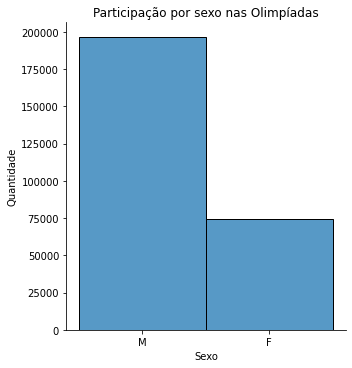

In [11]:
sns.displot(data=atletas, x="Sex", kind='hist')
plt.title('Participação por sexo nas Olimpíadas')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')

###Verificando os dados

In [12]:
atletas.isnull()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [13]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
atletas[atletas['Sport'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [15]:
atletas[atletas['City'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [16]:
atletas[atletas['Year'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [17]:
atletas[atletas['Sex'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [18]:
atletas[atletas['Weight'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


In [19]:
atletas[atletas['Height'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271038,135539,Marius Edmund Zwiller,M,18.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Men's 200 metres Breaststroke,NaN
271042,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
271043,135542,Werner Zwingli,M,29.0,NaN,NaN,Switzerland,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
271075,135552,Jan (Johann-) Zybert (Siebert-),M,20.0,NaN,NaN,Poland,POL,1928 Summer,1928,Summer,Amsterdam,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN


In [20]:
atletas[atletas['Team'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [21]:
atletas[atletas['NOC'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [22]:
atletas[atletas['Games'].isnull()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


In [23]:
sem_medadalha = atletas[atletas['Medal'].isnull()].shape[0]
sem_medadalha

231333

In [24]:
atletas['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [25]:
com_medalha = atletas[atletas['Medal'].notnull()].shape[0]
com_medalha

39783

Temos apenas em branco: peso, altura e medalhas. 
Não é no momento um problema então não serão eliminados mas sim aproveitados.

###Quais são os tipos de dados que iremos manipular? (por tabela)

In [26]:
tipos_de_dados = pd.DataFrame(data=atletas.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados.columns.name = "Variáveis"
tipos_de_dados

Variáveis,Tipos de Dados
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


In [27]:
print(f'A base de dados apresenta {atletas.shape[0]} registros e {atletas.shape[1]} variáveis.')

A base de dados apresenta 271116 registros e 15 variáveis.


##Exploração de dados

###Quantas edições aconteceram durante 1896 até 2016? (por tabela)

In [28]:
jogos = atletas['Games']
epoca_dos_jogos = jogos.drop_duplicates()
epoca_dos_jogos = pd.DataFrame(epoca_dos_jogos)
epoca_dos_jogos.index = range(epoca_dos_jogos.shape[0])
epoca_dos_jogos.columns.name = "Id"
epoca_dos_jogos

Id,Games
0,1992 Summer
1,2012 Summer
2,1920 Summer
3,1900 Summer
4,1988 Winter
5,1992 Winter
6,1994 Winter
7,1932 Summer
8,2002 Winter
9,1952 Summer


###Qual é o total de pessoas que participaram em cada edição? (por gráfico)

###Como funciona a distribuição entre cada esporte?

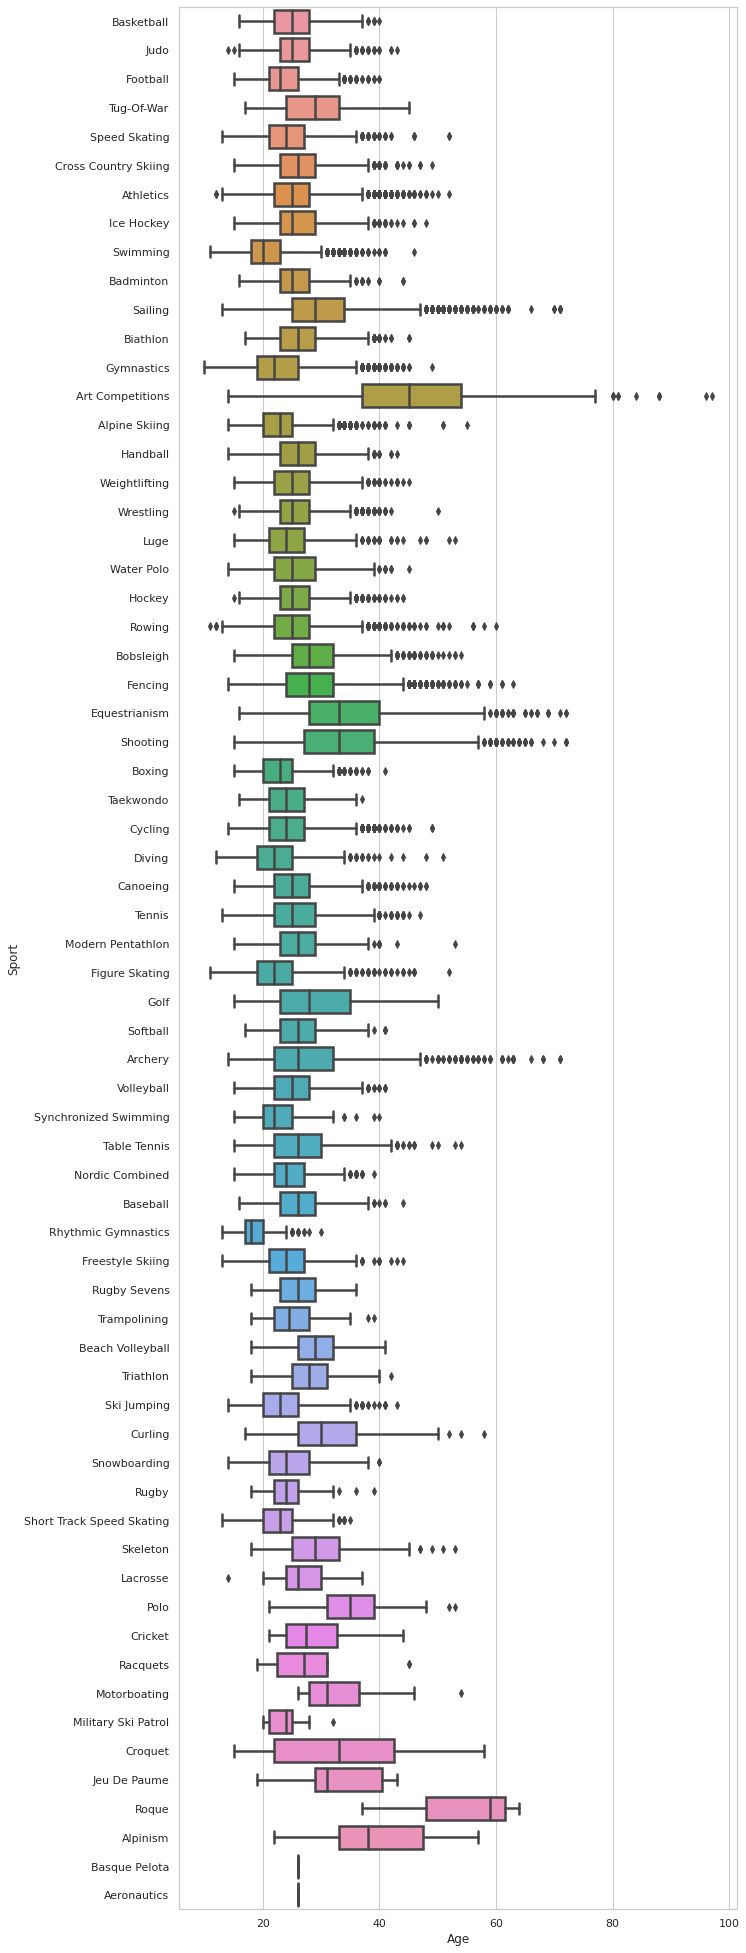

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,35))
sns.boxplot(x = 'Age',
            y ='Sport',
            data = atletas,
            linewidth=2.5)
plt.show()

###Como funciona a distribuição das medalhas? (por tabela e gráfico)

In [30]:
medalhas = ['Gold','Silver','Bronze']
selecao_bairro = atletas['Medal'].isin(medalhas)
novas_variaveis = atletas[selecao_bairro]
novas_variaveis

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [31]:
novas_variaveis['Medal'].unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

In [32]:
aa = novas_variaveis.groupby('Medal')

In [33]:
aa['Medal'].value_counts()

Medal   Medal 
Bronze  Bronze    13295
Gold    Gold      13372
Silver  Silver    13116
Name: Medal, dtype: int64

In [34]:
total_de_medalhas_ouro = novas_variaveis.loc[novas_variaveis['Medal']=='Gold']
total_de_medalhas_ouro.reset_index(inplace=True)
total_de_medalhas_ouro['Medal'].value_counts()

Gold    13372
Name: Medal, dtype: int64

In [35]:
total_de_medalhas_prata = novas_variaveis.loc[novas_variaveis['Medal']=='Silver']
total_de_medalhas_prata.reset_index(inplace=True)
total_de_medalhas_prata['Medal'].value_counts()

Silver    13116
Name: Medal, dtype: int64

In [36]:
total_de_medalhas_bronze = novas_variaveis.loc[novas_variaveis['Medal']=='Bronze']
total_de_medalhas_bronze.reset_index(inplace=True)
total_de_medalhas_bronze['Medal'].value_counts()

Bronze    13295
Name: Medal, dtype: int64

In [37]:
for medalha, dados in aa:
  print(dados)

            ID  ...   Medal
37          15  ...  Bronze
38          15  ...  Bronze
40          16  ...  Bronze
41          17  ...  Bronze
50          17  ...  Bronze
...        ...  ...     ...
271032  135535  ...  Bronze
271048  135545  ...  Bronze
271080  135553  ...  Bronze
271082  135554  ...  Bronze
271102  135563  ...  Bronze

[13295 rows x 15 columns]
            ID  ... Medal
3            4  ...  Gold
42          17  ...  Gold
44          17  ...  Gold
48          17  ...  Gold
60          20  ...  Gold
...        ...  ...   ...
270981  135503  ...  Gold
271009  135520  ...  Gold
271016  135523  ...  Gold
271049  135545  ...  Gold
271076  135553  ...  Gold

[13372 rows x 15 columns]
            ID  ...   Medal
63          20  ...  Silver
67          20  ...  Silver
86          25  ...  Silver
92          30  ...  Silver
106         38  ...  Silver
...        ...  ...     ...
271013  135522  ...  Silver
271015  135523  ...  Silver
271046  135544  ...  Silver
271078  135553  ..

In [38]:
for medalha, dados in aa:
  print(f"{medalha}: sua média de peso é {dados.Weight.mean()}")

Bronze: sua média de peso é 73.47900981063198
Gold: sua média de peso é 74.1838794616735
Silver: sua média de peso é 73.64496240601504


In [39]:
aa['Medal'].describe()

,count,unique,top,freq
Medal,,,,
Bronze,13295,1,Bronze,13295
Gold,13372,1,Gold,13372
Silver,13116,1,Silver,13116


In [40]:
aa['Age'].aggregate(['count','mean','std','min','max','sum']).rename(columns = {'count':'Quantidade','mean':'Média','std':'Desvio Padrão','min':'Mínimo','max':'Máximo','sum':'Soma'})

,Quantidade,Média,Desvio Padrão,Mínimo,Máximo,Soma
Medal,,,,,,
Bronze,13006,25.879210,5.831923,10.0,72.0,336585.0
Gold,13224,25.901013,5.892887,13.0,64.0,342515.0
Silver,12821,25.996724,6.017395,11.0,73.0,333304.0


Nesta analise encontramos algumas coisas interessantes como: um atleta que ganhou aos 73 anos a medalha de prata.
 
<a href='https://institutodelongevidademag.org/longevidade-e-comportamento/esportes/atletas-mais-velhos'>Aqui tem mais informação sobre essa curiosidade </a>

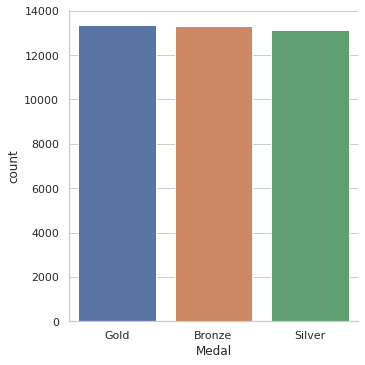

In [41]:
sns.catplot( kind='count',
             data = novas_variaveis['Medal'],
             x= novas_variaveis['Medal'])

###Faixa de idade por sexo das Olimpíadas (por gráfico)

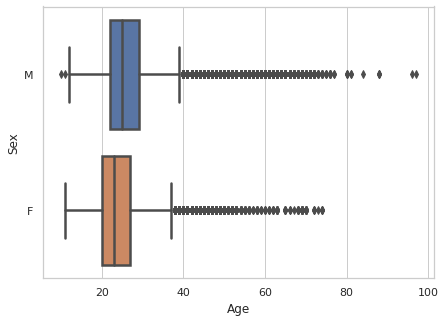

In [42]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,5))
sns.boxplot(x = 'Age',
            y ='Sex',
            data = atletas,
            linewidth=2.5)
plt.show()

###Faixa de idade entre edições das olimpíadas (por gráfico)

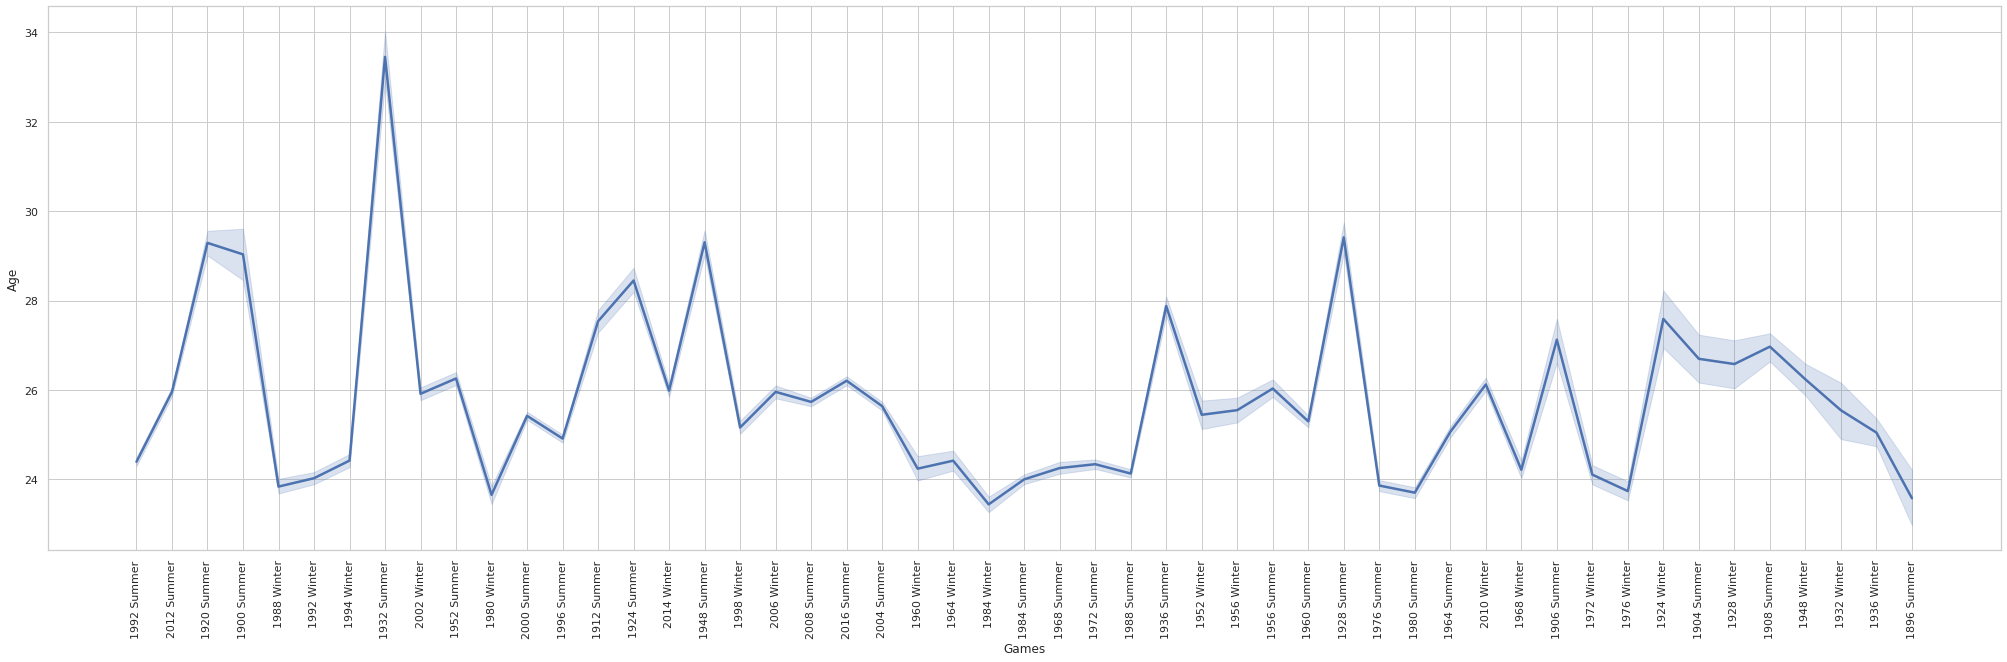

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(35,10))
sns.lineplot(x = 'Games',
            y ='Age',
            data = atletas,
            linewidth=2.5)
plt.xticks(rotation = 90)
plt.show()

###Aparição de jogos em edições (por gráficos)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65],
 <a list of 66 Text major ticklabel objects>)

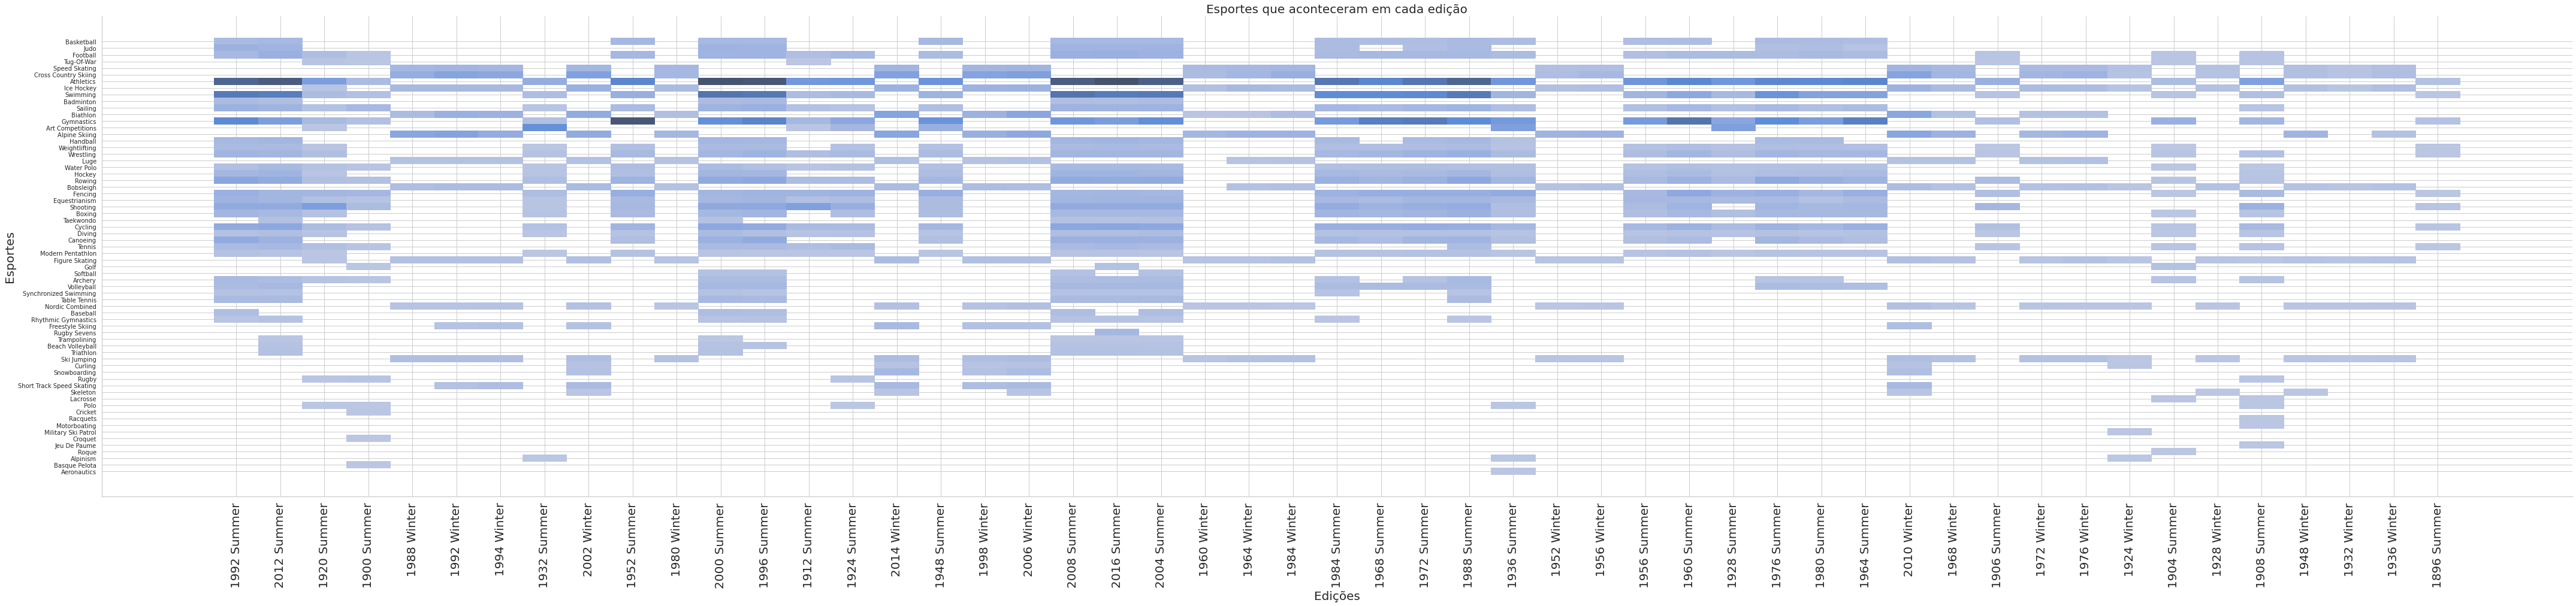

In [44]:
sns.displot(data=atletas, x="Games", y ='Sport', kind='hist', height = 12, aspect = 5)
plt.title('Esportes que aconteceram em cada edição', fontsize=20)
plt.ylabel('Esportes', fontsize=20)
plt.xlabel('Edições', fontsize=20)
plt.xticks(rotation = 90, fontsize=20)
plt.yticks(fontsize=10)


###Em quais estações do ano as Olimpíadas aconteceram?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text major ticklabel objects>)

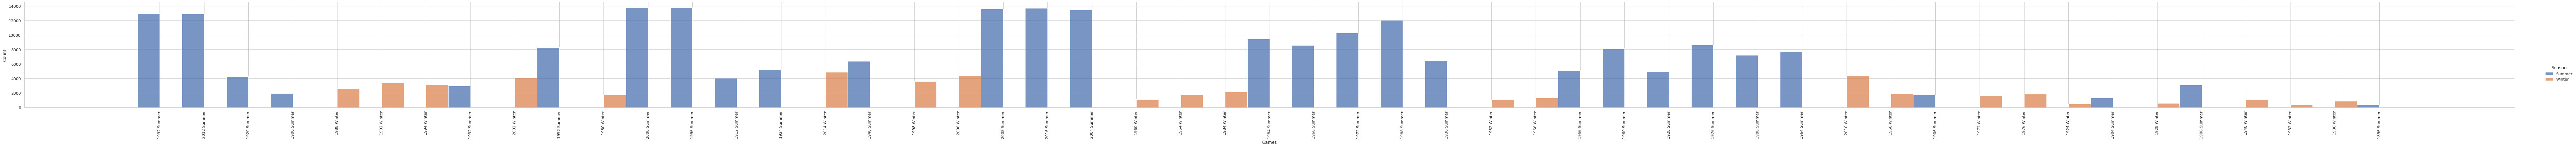

In [45]:
sns.displot(data=atletas, x="Games",hue='Season',multiple="dodge",aspect=20)
plt.xticks(rotation =90)

In [46]:
atletas.Season.unique()

array(['Summer', 'Winter'], dtype=object)

###Total de participantes por sexo em cada edição (por gráfico)

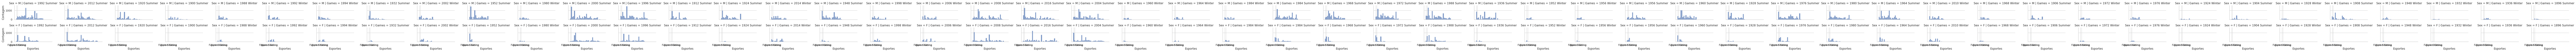

In [47]:
g = sns.FacetGrid(atletas, col="Games",row='Sex', palette="tab20c", height=1.5, aspect = 2)
g.map_dataframe(sns.histplot, x='Sport')
g.set_axis_labels('Esportes','Contagem')

###Identificando e removendo Outliers em idade de atletas Olímpicos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


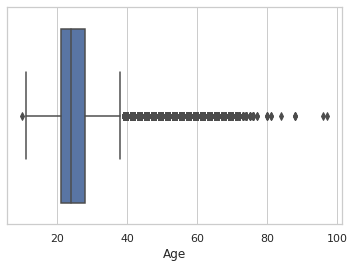

In [48]:
sns.boxplot(atletas["Age"])


Nesse momento nós conseguimos perceber que existe casos de Outliers no caso de idade mais avançadas nesse dataset, porém percebemos que ao mesmo tempo que é pitoresco também não é muito útil então para nossa análise então vamos retirar.

In [49]:
atletas.Age.value_counts()

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
81.0        2
10.0        1
97.0        1
96.0        1
84.0        1
Name: Age, Length: 74, dtype: int64

In [50]:
idades = atletas.Age
Q1 = idades.quantile(.25)
Q3 = idades.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
selecao_outlier = (idades >= limite_inferior) & (idades <= limite_superior)
idades_atletas =  atletas[selecao_outlier]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


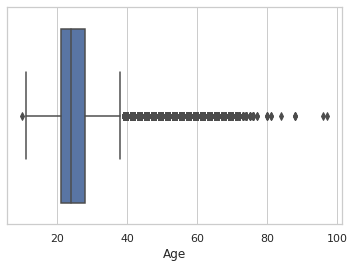

In [51]:
sns.boxplot(atletas["Age"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


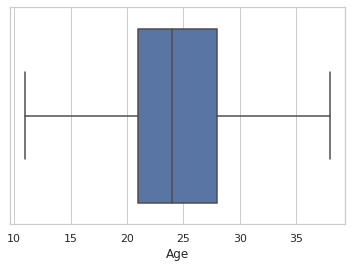

In [52]:
sns.boxplot(idades_atletas["Age"])

In [53]:
idades_atletas["Age"].value_counts()

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
26.0    17675
27.0    16025
20.0    15258
28.0    14043
19.0    11643
29.0    11463
30.0     9488
18.0     8152
31.0     7559
32.0     6246
17.0     5376
33.0     4800
34.0     3985
16.0     3852
35.0     3133
36.0     2503
15.0     2203
37.0     1953
38.0     1612
14.0      837
13.0      187
12.0       39
11.0       13
Name: Age, dtype: int64

Percebemos que as Olimpíadas recebe em suas edições uma grande quantidade de atletas que são majoritariamente jovem (entre 11 anos até 38 anos), e isso pode estar ligado intrisicamente aos esportes que praticam.




In [54]:
grupo_jogos = atletas.groupby('Games')['Age']

In [55]:
Q1 = grupo_jogos.quantile(.25)
Q3 = grupo_jogos.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [56]:
Q1

Games
1896 Summer    21.00
1900 Summer    22.00
1904 Summer    21.50
1906 Summer    22.00
1908 Summer    22.00
1912 Summer    22.00
1920 Summer    23.00
1924 Summer    22.00
1924 Winter    23.00
1928 Summer    22.00
1928 Winter    22.00
1932 Summer    23.00
1932 Winter    22.00
1936 Summer    22.00
1936 Winter    22.00
1948 Summer    23.00
1948 Winter    22.00
1952 Summer    22.00
1952 Winter    22.00
1956 Summer    22.00
1956 Winter    22.00
1960 Summer    21.00
1960 Winter    21.00
1964 Summer    21.00
1964 Winter    21.00
1968 Summer    20.00
1968 Winter    21.00
1972 Summer    20.00
1972 Winter    21.00
1976 Summer    20.00
1976 Winter    20.25
1980 Summer    20.00
1980 Winter    20.00
1984 Summer    20.00
1984 Winter    21.00
1988 Summer    21.00
1988 Winter    21.00
1992 Summer    21.00
1992 Winter    21.00
1994 Winter    22.00
1996 Summer    21.00
1998 Winter    22.00
2000 Summer    22.00
2002 Winter    23.00
2004 Summer    22.00
2006 Winter    23.00
2008 Summer    22.00
2010 Wi

In [57]:
Q3

Games
1896 Summer    26.00
1900 Summer    34.00
1904 Summer    29.00
1906 Summer    29.75
1908 Summer    30.00
1912 Summer    31.00
1920 Summer    34.00
1924 Summer    32.00
1924 Winter    30.00
1928 Summer    34.00
1928 Winter    30.00
1932 Summer    42.00
1932 Winter    28.00
1936 Summer    30.00
1936 Winter    27.00
1948 Summer    34.00
1948 Winter    29.00
1952 Summer    30.00
1952 Winter    28.00
1956 Summer    29.00
1956 Winter    28.00
1960 Summer    28.00
1960 Winter    27.00
1964 Summer    28.00
1964 Winter    27.00
1968 Summer    27.00
1968 Winter    27.00
1972 Summer    27.00
1972 Winter    27.00
1976 Summer    27.00
1976 Winter    26.00
1980 Summer    27.00
1980 Winter    26.00
1984 Summer    26.00
1984 Winter    26.00
1988 Summer    27.00
1988 Winter    26.00
1992 Summer    27.00
1992 Winter    26.00
1994 Winter    27.00
1996 Summer    28.00
1998 Winter    28.00
2000 Summer    28.00
2002 Winter    29.00
2004 Summer    29.00
2006 Winter    29.00
2008 Summer    29.00
2010 Wi